<a href="https://colab.research.google.com/github/SarahShkb/speaker_age_predictor/blob/main/speaker_age_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pydub

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pydub
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
def separate_channels(audio_path):
    """
    Loads an audio file and separates its channels into individual numpy arrays.

    Parameters:
    audio_path (str): Path to the audio file

    Returns:
    tuple: (left_channel, right_channel) as numpy arrays
    """
    # Load the audio file
    audio = pydub.AudioSegment.from_file(audio_path)

    # Get the raw audio data as an array of samples
    samples = np.array(audio.get_array_of_samples())

    # If audio is mono, return the same array for both channels
    if audio.channels == 1:
        return samples, samples

    # Reshape the array to separate channels
    # samples contains alternating values for left and right channels
    samples = samples.reshape((-1, audio.channels))

    # Extract left and right channels
    left_channel = samples[:, 0]
    right_channel = samples[:, 1]

    return left_channel, right_channel

In [37]:
def get_audio_file_data(audio_path, normalized=False):
  a = pydub.AudioSegment.from_mp3(audio_path)
  y = np.array(a.get_array_of_samples())
  print(a.frame_rate)

  if a.channels == 2:
      results = []
      print(y.shape)
      results.append(y[:,0])
      results.append(y[:,1])
      return results, a.channels
  if normalized:
      return a, np.float32(y) / 2**15
  else:
      print(y.shape)
      return y, a.channels

In [38]:

base_addr = "drive/MyDrive/DSL_Winter_Project_2025/audios_development/"
get_audio_file_data(base_addr +'1.wav')


44100
(1547700,)


(array([-19, -25, -15, ...,  25,  38,  35], dtype=int16), 1)

In [6]:
def aggregate_audio_array(n):
  audio_dict = {}
  for i in range(1,n):
    audio_file_object = get_audio_file_data(base_addr+ str(i) +'.wav')

    #audio_file_object[1] is num of channels
    if audio_file_object[1] in audio_dict:
      audio_dict[audio_file_object[1]].append(audio_file_object[0])
    else:
      audio_dict[audio_file_object[1]] = [audio_file_object[0]]
  return audio_dict

In [7]:
audio_objects = aggregate_audio_array(100)

In [8]:
print(audio_objects.keys())
print(len(audio_objects[1]))
print(len(audio_objects[2]))

dict_keys([1, 2])
63
36


In [20]:
print(len(audio_objects[2]))

36


IndexError: list index out of range

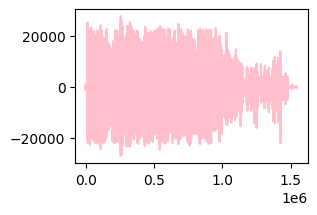

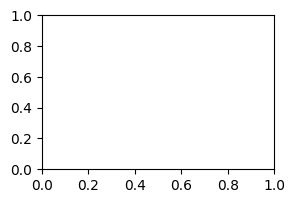

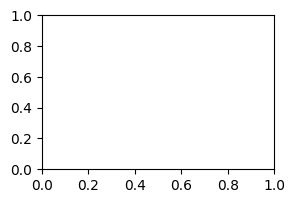

In [9]:
colors=['blue','orange','green','pink']
fig1, ax1 = plt.subplots(figsize=(3, 2))
fig2, ax2 = plt.subplots(figsize=(3, 2))
fig3, ax3 = plt.subplots(figsize=(3, 2))
for i in range(20):
  ax1.plot(audio_objects[1][i],c=colors[3])
for j in range(20):
  for k in range(1):
    if k==0:
      ax2.plot(audio_objects[2][j][k], c=colors[k])
    else:
      ax3.plot(audio_objects[2][j][k], c=colors[k])

plt.show()